In [273]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np

In [274]:
filename = "/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/tp-4/data.csv"

# Parsing

Aclaraciones previas:

Debido a la forma en que tomamos los datos del achivo de colaboraciones entre autores, nos dimos cuanta que algunos nombres no parecen ser nombres válidos de autores, como por ejemplo: ")". Dado que la cantidad de esos errores sobre la cantidad de datos que teníamos era despreciable, decidimos no remover esos elementos.
Por otro lado, aplicamos un filtro para caracteres que estaban siendo utilizados para separar los distintos autores, dado que no pertenecen a los nombres de los mismos, como por ejemplo: "--".

In [3]:
def filter_word(word):
    word = word.replace(" ", "")
    word = word.replace("--", "-")
    word = word.upper()
    return word.replace("\\.", "")

In [4]:
co_autores = [] # Lista de papers en las cuales hay mas de un autor
autores = [] # lista de los autores de papers en los cuales hay dos o mas autores
lobos_solitarios = [] # autores de papers en los cuales solo hay un único autor

with open(filename,'r') as f:
    for line in f:
        line = line.split(',')
        line = line[3].split('&')
        cleaned_line = [filter_word(w) for w in line]
        if len(cleaned_line) > 1:
            co_autores.append(cleaned_line)
            for i in cleaned_line:
                autores.append(i)
        else:
            lobos_solitarios.append(cleaned_line)

autores= list(set(autores))

In [5]:
autores_size = len(autores)
adys = np.zeros((autores_size,autores_size))
co_autores_data = pd.DataFrame(data=adys, columns=autores, index=autores)
co_autores_data.max()

lista_de_tuplas=[]
for TUPLA in co_autores:
    pares=list(itertools.combinations(TUPLA, 2))
        
    for i in pares:
        lista_de_tuplas.append(i)
        co_autores_data[i[0]][i[1]]=co_autores_data[i[0]][i[1]]+1
        co_autores_data[i[1]][i[0]]=co_autores_data[i[1]][i[0]]+1
        
lista_de_tuplas = list(set(lista_de_tuplas))

## Ejercicio 1

In [88]:
print "Cantidad de nodos: "
print len(autores)

print "Cantidad de aristas: "
print len(lista_de_tuplas)

Cantidad de nodos: 
3684
Cantidad de aristas: 
8113


Debido a la gran cantidad de nodos y aristas del grafo, debimos graficar un subgrafo del mismo. Para ello implementamos una función recursiva que parte de un nodo inicial e incorpora tantos niveles como indica el parámetro.

In [86]:
def obtener_subgrafo(el_grafo, inicial, iteraciones):
    grafo=el_grafo[:]
    subgrafo=[]
    if(iteraciones>0):
        adys=[]
        for arista in grafo:
            if(arista[0]==inicial):
                subgrafo.append(arista)
                grafo.remove(arista)
                adys.append(arista[1])
            else:
                if(arista[1]==inicial):
                    subgrafo.append(arista)
                    grafo.remove(arista)
                    adys.append(arista[0])
        for nodo in adys:
            res = obtener_subgrafo(grafo, nodo, iteraciones-1)
            subgrafo = subgrafo + res

    return list(set(subgrafo))

In [269]:
sub_grafo = obtener_subgrafo(lista_de_tuplas , "MARU", 3)

In [270]:
print "Cantidad de aristas del subgrafo: "
print len(sub_grafo)

Cantidad de aristas del subgrafo: 
159


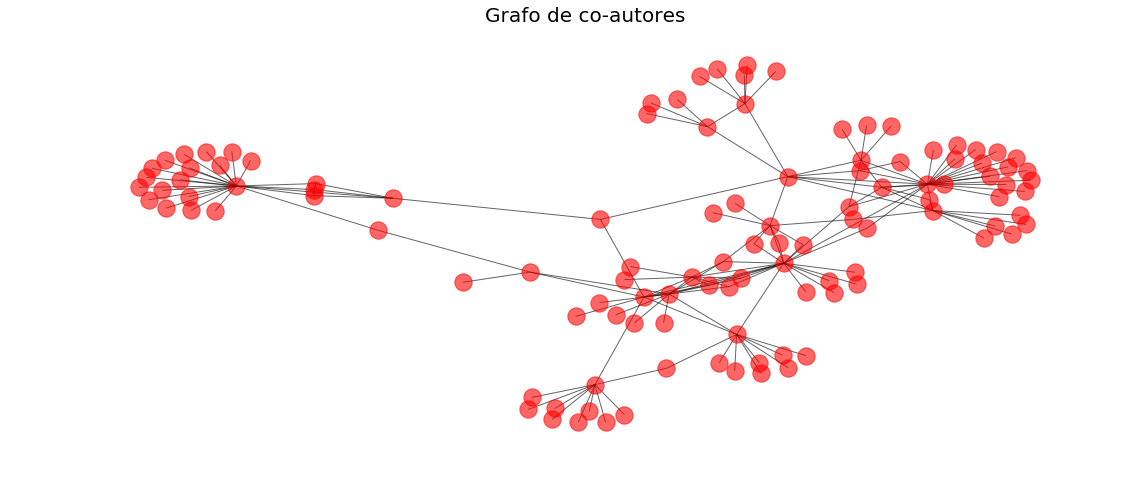

In [271]:
G_ej1 = nx.Graph()
G_ej1.add_edges_from(sub_grafo)
plt.figure(figsize=(15,6))
nx.draw_spring(G_ej1, alpha=0.6, with_labels=False, font_size= 11)
plt.title ("Grafo de co-autores", fontdict = {'fontsize':20})
plt.show()

## Ejercicio 2

En primer lugar graficamos el grado en función de nodos ordenados según su grado

In [279]:
list(nx.degree(G_ej2)).values()

AttributeError: 'list' object has no attribute 'values'

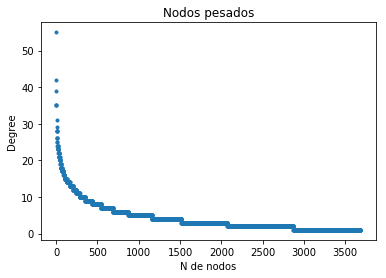

In [280]:
G_ej2 = nx.Graph()
G_ej2.add_edges_from(lista_de_tuplas)

degrees = np.array(nx.degree(G_ej2))[:,1]
rango = range(0,len(degrees))
degrees = [int(d) for d in degrees]
degrees = sorted(degrees, reverse=True)
plt.plot(rango, degrees,'.')
plt.ylabel("Degree")
plt.xlabel("N de nodos")
plt.title("Nodos pesados")
plt.show()

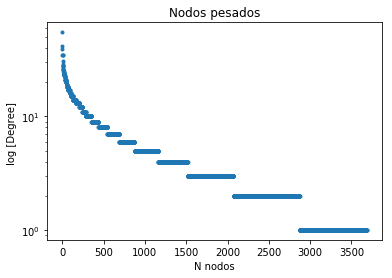

In [281]:
plt.clf()
plt.semilogy(rango, degrees, '.')
plt.title("")
plt.ylabel("log [Degree] ")
plt.xlabel("N nodos")
plt.title("Nodos pesados")
plt.show()
#plt.yscale('log')

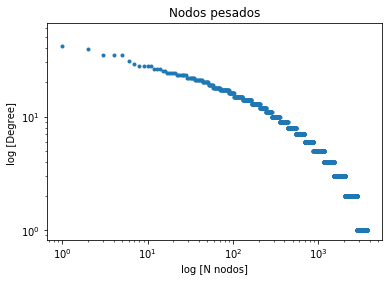

In [282]:
plt.clf()
plt.plot(rango, degrees,'.')
plt.yscale('log')
plt.xscale('log')
plt.ylabel("log [Degree] ")
plt.xlabel("log [N nodos]")
plt.title("Nodos pesados")
plt.show()

## Version histogramas

Lo anterior no es del todo correcto. Un gráfico más acorde (que resume mejor la información) es cantidad de nodos en función del grado, obtenida a partir de un histograma

In [283]:
values, bins = np.histogram(co_autores_data.sum(axis=0), bins=50)

In [284]:
nuevos_bins = []
for i in range(0, len(bins)-1):
    bins_i = (bins[i] + bins[i + 1])/float(2)
    nuevos_bins.append(bins_i)

Al graficar ambos ejes con escala lineal, observamos una curva: Puede indicar tanto una Ley de Potencias como una Exponencial

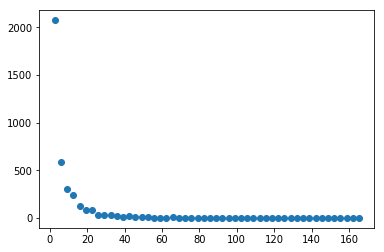

In [285]:
plt.plot(nuevos_bins, values, 'o')
plt.show()

Al graficar el eje Y con escala logarítmica, seguimos observando una curva. Esto indica que la distribución de grado no es exponencial

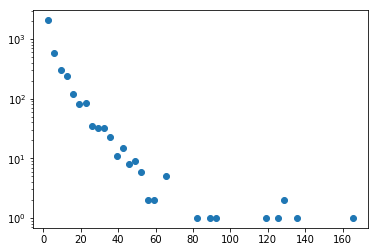

In [286]:
plt.clf()
plt.plot(nuevos_bins, values, 'o')
plt.yscale("log")
plt.show()

Pero, al graficar ambos ejes con escala logarítmica observamos una recta, lo cual es indicio de una distribución de grado que sigue una Ley de Potencias. Este tipo de distribución es propio de las redes libres de escala. Esta primera visualización nos permite inferir posibles patrones de conexión en los autores de nuestra red.  Es probable  que algunos  autores (nodos) esten altamente conectados, es decir, posean un gran número de enlaces a otros autores, pero que el grado de conexión directa (haber trabajado en un trabajo juntos) de la mayoria de los autores con los otros miembros de la red es bastante bajo.

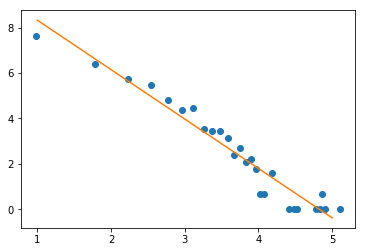

In [287]:
res = []
for i in range(0,len(values)):
    if(values[i] != 0):
        res.append(((np.log(nuevos_bins[i])), (np.log(values[i]))))
log_nuevos_bins = [t[0] for t in res]
log_values = [t[1] for t in res]
plt.plot(log_nuevos_bins, log_values, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(log_nuevos_bins,log_values)
ys = [slope * i + intercept  for i in range(1,6)]   
plt.plot(range(1,6), ys)
plt.show()

# Ej3: componentes_conexas

In [183]:
G_ej3 = nx.Graph()
G_ej3.add_edges_from(lista_de_tuplas)

In [186]:
componentes_conexas = list(nx.connected_components(G_ej3))

In [187]:
print "El número de componentes conexas es: "
print len(componentes_conexas)

El número de componentes conexas es: 
224


In [288]:
cardinal = [ len(l) for l in componentes_conexas]
maximo = max(cardinal)

print "Cantidad total de autores (nodos): "
print len(autores)
print "El tamaño de la componente gigante es: "
print maximo

Cantidad total de autores (nodos): 
3684
El tamaño de la componente gigante es: 
3046


# Ej4: Tamaño de vecindades

In [27]:
componente_gigante = list(componentes_conexas[cardinal.index(maximo)])

In [192]:
def cantidad_de_vecinos():
    import random as rd
    iteraciones = 6 # es el grado de separacion
    cant_personas = 10
    autores_rd = [componente_gigante[rd.randint(0,len(componente_gigante))] for i in range(0, cant_personas)]

    autores_x_profundidad = np.zeros((cant_personas,iteraciones))

    for i in range(0,len(autores_rd)):
        for j in range(1,iteraciones):
            subgrafo = obtener_subgrafo(lista_de_tuplas, autores_rd[i], j)
            G_i = nx.Graph()
            G_i.add_edges_from(subgrafo)
            cantidad_de_vec = len(G_i.nodes())
            autores_x_profundidad[i][j] = int(cantidad_de_vec)

    print 'Totales'
    totales = autores_x_profundidad[:,1:]
    
    for i in range(0,len(autores_rd)):
        for j in range(1,iteraciones):
            for k in range(0,j):
                autores_x_profundidad[i][j] = autores_x_profundidad[i][j] - autores_x_profundidad[i][k]
    print 'Por nivel'
    por_nivel = autores_x_profundidad[:,1:]
    print "Los autores fueron: ", autores_rd
    return autores_rd, totales, por_nivel

In [193]:
autores_rd, totales, por_nivel = cantidad_de_vecinos()

Totales
Por nivel
Los autores fueron:  ['IELLICI', 'LAWRENCE', 'EWEN', 'WEIGERT', 'EZAWA', 'LAFRANCE', 'LOVE', 'SLEATOR', 'DALVIT', 'BERGERON']


Graficamos cómo aumenta el tamaño de las vecindades en función de los niveles. Se observa un aumento considerable de un nivel respecto del siguiente. La forma es una parábola creciente. Podría seguir una ley de potencias o exponencial. Por la "Prueba 1", creemos que el promedio tiene una distribucion exponenecial.

###### Número de autores alcanzados en función de la distancia al nodo semilla

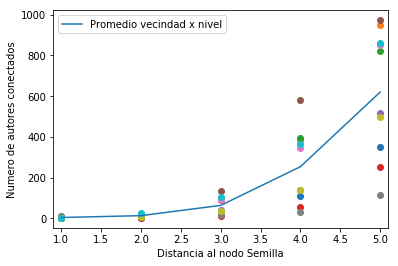

In [289]:
for tamanio_x_niveles_autor in totales:
    plt.plot(range(1,6),tamanio_x_niveles_autor,'o')
promedio_tamanio_x_niveles_autor = np.mean(totales, axis=0)
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor, label="Promedio vecindad x nivel")
plt.legend()
plt.xlim((0.9,5.1))
plt.xlabel("Distancia al nodo Semilla")
plt.ylabel("Numero de autores conectados")
plt.show()

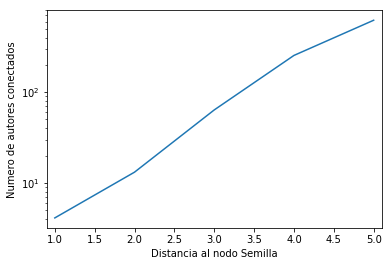

In [290]:
#Prueba 1
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor, label="Prom tam x nivel")
plt.xlim((0.9,5.1))
plt.xlabel("Distancia al nodo Semilla")
plt.ylabel("Numero de autores conectados")
plt.yscale("log")

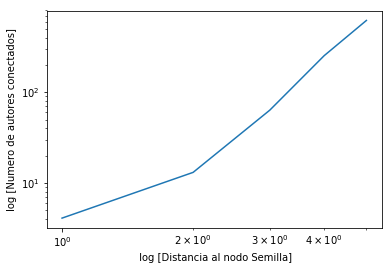

In [291]:
#Prueba 2

plt.plot(range(1,6),promedio_tamanio_x_niveles_autor, label="Prom tam x nivel")
plt.yscale("log")
plt.xscale("log")
plt.xlabel(" log [Distancia al nodo Semilla]")
plt.ylabel("log [Numero de autores conectados]")

##### Número de nuevos autores que se agregan en cada paso

Al igual que el caso anterior, observamos que al considerar únicamente las diferencias entre el nivel actual y el anterior la distribución también es exponencial.

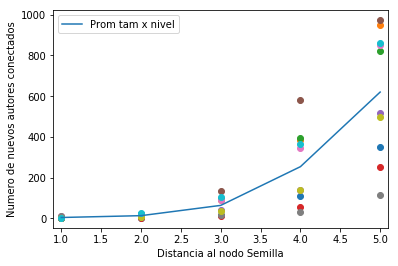

In [292]:
for tamanio_x_niveles_autor in por_nivel:
    plt.plot(range(1,6),tamanio_x_niveles_autor,'o')
promedio_tamanio_x_niveles_autor_cp = np.mean(por_nivel, axis=0)
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor_cp, label="Prom tam x nivel")
plt.xlim((0.9,5.1))
plt.legend()
plt.xlabel("Distancia al nodo Semilla")
plt.ylabel("Numero de nuevos autores conectados")
plt.show()

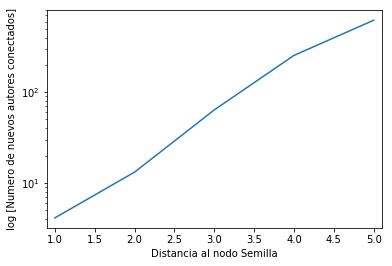

In [293]:
#Prueba 1
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor_cp, label="Prom tam x nivel")
plt.yscale("log")
plt.xlim((0.9,5.1))
plt.xlabel("Distancia al nodo Semilla")
plt.ylabel("log [Numero de nuevos autores conectados]")

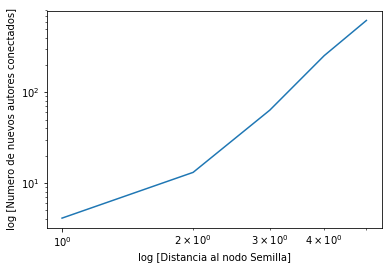

In [294]:
#Prueba 1
plt.plot(range(1,6),promedio_tamanio_x_niveles_autor_cp, label="Prom tam x nivel")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("log [Distancia al nodo Semilla]")
plt.ylabel("log [Numero de nuevos autores conectados]")

Luego de realizar los 2 graficos, es decir, la cantidad de nodos totales que tiene el grafo en cada nivel y las diferencias entre un nivel y el anterior, vemos que ambas distribuciones son exponenciales si calculamos los valores para los niveles 1 a 6. 

Esperamos que a partir de los siguientes niveles la curva adquiera otra distribución dado que con 6 grados de separación se alcanza un tamaño que representa un gran porcentaje de los nodos totales.

## Ejercicio 5
#### Clustering Coeficient

In [222]:
G_ej5 = nx.Graph()
G_ej5.add_edges_from(lista_de_tuplas)
componentes_conexas = list(nx.connected_components(G_ej5))
contenedor_ggigante = componentes_conexas[0]

In [230]:
A = nx.clustering(G_ej5,contenedor_ggigante)
B = nx.average_clustering(G_ej5, contenedor_ggigante)

In [229]:
print "Coeficiente de Clustering promedio para la componente gigante: "
print B

Coeficiente de Clustering promedio para la componente gigante: 
0.483770334643


#### Shortest Path Length

In [232]:
subgraph = G_ej5.subgraph(contenedor_ggigante)
SPL = nx.average_shortest_path_length(subgraph)

In [233]:
print "Longitud del camíno mínimo promedio de la componente gigante: "
print SPL

Longitud del camíno mínimo promedio de la componente gigante: 
6.08549326312


El spl es aproximadamente 6, lo que la separacion promedio entre 2 autores en el grafo de colaboraciones es 6. A su vez el coeficiente de agrupamiento (clustering) se aproxima a un valor de 0.5 indicando un alto nivel de interconexión entre los vecinos. Ambas característica de la componente gigante son propias de una estructura de mundo pequeño.

## Generación de grafo aleatorio con misma distribución

Generamos 2 grafos aleatorios de distinto tipo. 
El primero repeta exactamente la misma distribución de los grados, mientras que el segundo utiliza únicamente el grado promedio.

In [295]:
d = nx.degree(subgraph)
d = np.array(d)
d = d[:,1].astype(np.float)
degree_random = np.mean(d)
random_graph = nx.random_degree_sequence_graph(list(d.astype(np.int)))
random_graph_2 = nx.random_regular_graph(int(degree_random), len(subgraph.nodes()), seed=None)

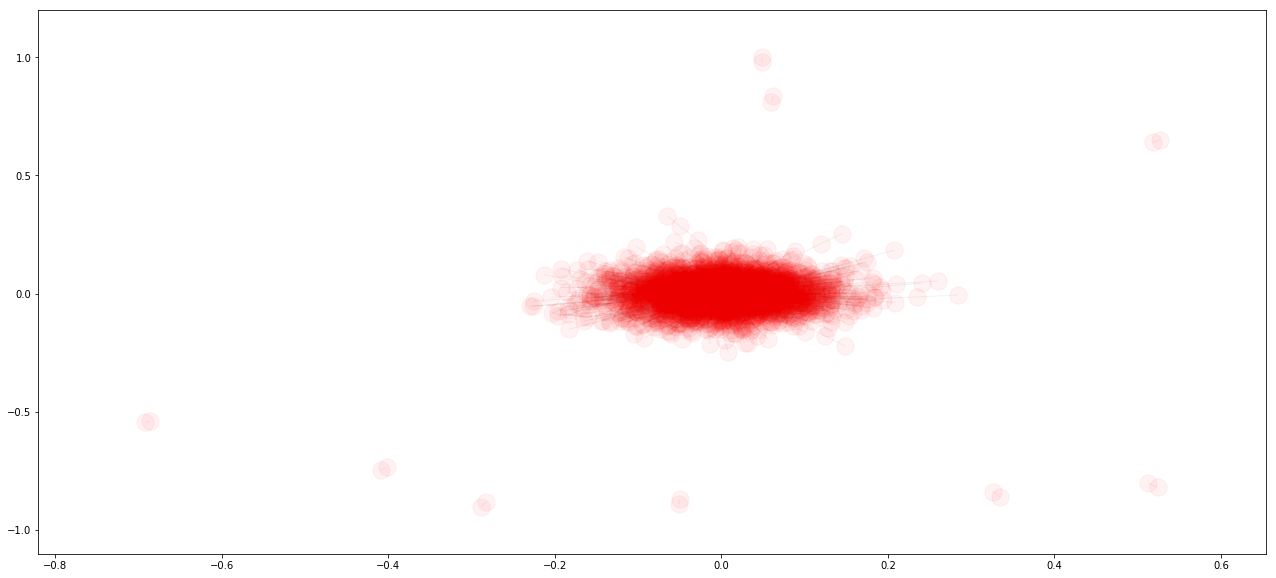

In [296]:
plt.figure(figsize=(22,10))
nx.draw_networkx(random_graph, alpha=0.05, with_labels=False)

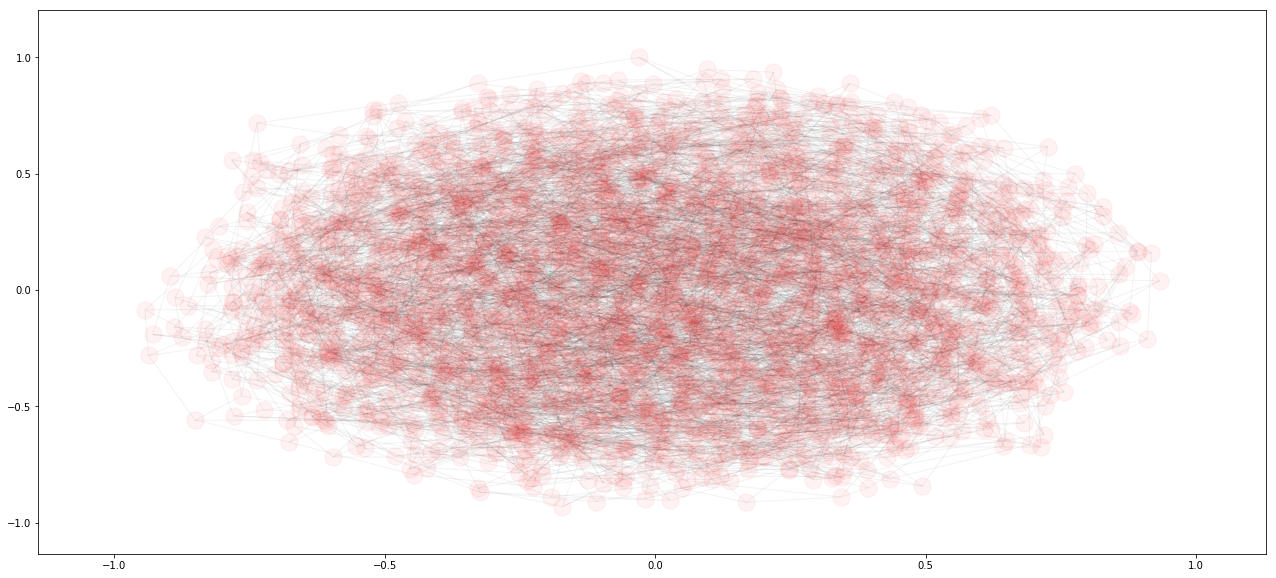

In [297]:
plt.figure(figsize=(22,10))
nx.draw_networkx(random_graph_2, alpha=0.05, with_labels=False)

In [299]:
componentes_conexas_random_graph = list(nx.connected_components(random_graph))
contenedor_ggigante_random_graph = componentes_conexas_random_graph[0]
print "Coeficiente de Clustering para el primer grafo aleatorio: "
print nx.average_clustering(random_graph, contenedor_ggigante_random_graph)

componentes_conexas_random_graph_2 = list(nx.connected_components(random_graph_2))
contenedor_ggigante_random_graph_2 = componentes_conexas_random_graph_2[0]
print "Coeficiente de Clustering para el segundo grafo aleatorio: "
print nx.average_clustering(random_graph_2, contenedor_ggigante_random_graph_2)

Coeficiente de Clustering para el primer grafo aleatorio: 
0.00431146260989
Coeficiente de Clustering para el segundo grafo aleatorio: 
0.000820748522653


Observamos que el Coeficiente de Clustering para ambos grafos aleatorios presentan niveles de Coeficiente de Clustering (CC) con órdenes de magnitud menores al CC de la red de autores analizada anteriormente. 

Observamos que el grafo creado siguiendo la misma distribución de grados es un orden de magnitud mayor. Esto puede explicarse a partir de tomar los degrees de una red con un CC elevado, aumentando probabilidades de que los vecinos de cada nodo se conecten entre sí, sin embargo se observa que la distribución de grados no es el único parametro que determina el agrupamiento de los nodos.

In [300]:
c_gigante_random_graph = random_graph.subgraph(contenedor_ggigante_random_graph)
spl_random_graph = nx.average_shortest_path_length(c_gigante_random_graph)

c_gigante_random_graph_2 = random_graph_2.subgraph(contenedor_ggigante_random_graph_2)
spl_random_graph_2 = nx.average_shortest_path_length(c_gigante_random_graph_2)

In [256]:
print "Average Shortest Path para el primer grafo aleatorio: "
print spl_random_graph
print "Average Shortest Path para el segundo grafo aleatorio: "
print spl_random_graph_2

Average Shortest Path para el primer grafo aleatorio: 
4.72463373452
Average Shortest Path para el segundo grafo aleatorio: 
6.6488694964


En esta ocasión vemos que solamente el primer grafo aleatorio (respetando la distribución de grado) posee un camino mínimo medio menor al de nuestro grafo inicual. En este caso se trata de un valor de 4.7. Esto significa que este grafo presenta una distribución típicamente aleatoria (Bajo SPL y Bajo CC). En comparación con los dos grafos aleatorios generados observamos que solamente la distribucion de los co-autores presentan un ALTO CC y un relativamente bajo SPL. Característica propias de una red "pequeño mundo".

La longitud promedio del camino mínimo favorece al primer grafo aleatorio respecto del segundo grafo aleatorio. En principio puede resultar anti-intuitivo, ya que a mayor aleatoriedad la longitud promedio del camino mínimo debería ser menor. Sin embargo, el grado promedio elegido al crear el segundo grafo aleatorio fue 4, mientras que el grado promedio de la componente gigante original es 4.83. Esto puede ser la causa del fenómeno.


### 6 . "Estrellas"

# Betweeness centrality

La betweenness centrality (BC) o  "intermediación" es un medida de centralidad, la cual se calcula para cada nodo. Representa el numero de shortest paths que pasan por ese nodo. Esta medida permite ponderar la cantidad de información que pasa por este vertice. En el caso de nuestro grafo, la BC nos da cuenta de la importancia de un autor específico para relacionar diversos autores.


for cant_iteraciones:
    - componente_actual = encuentro componente conexa mas grande: componente gigante
    - guardo la proporcion de la componente_actual respecto al total
    - le calculo betweeness
    - tomo el maximo
    - lo saco

In [267]:
#valores iniciales
G_ej6 = subgraph
componente_actual = G_ej6
n = len(componente_actual.nodes())

Seteamos 300 iteraciones porque consideramos que es un número suficiente como para que la componente gigante se divida en varias otras. Se necesitan tantas iteraciones debido a que los vecinos están fuertemente conectados entre sí.

In [83]:
cant_iteraciones = 300

In [354]:
res_sobre_total = []
res_sobre_tam_anterior = []
#for i in range(0, cant_iteraciones):
    #tam_anterior = len(componente_actual.nodes())
    #componente_actual = max(nx.connected_component_subgraphs(componente_actual), key=len)
    #res_sobre_total.append(len(componente_actual.nodes())/float(n))
    #res_sobre_tam_anterior.append(float(len(componente_actual.nodes()))/tam_anterior)
    #dicc_betw_actual = nx.betweenness_centrality(componente_actual)
    #node_with_max_betw = max(dicc_betw_actual.iteritems(), key=operator.itemgetter(1))[0]
    #componente_actual.remove_node(node_with_max_betw)

Guardamos los resultados en el notebook para no tener que computar las 300 iteraciones cada vez, ya que toma varias horas de corrida 

In [318]:
res_betweeness_sobre_total = [1.000, 0.998, 0.998, 0.996, 0.996, 0.996, 0.995, 0.995, 0.994, 0.990, 0.990, 0.990, 0.987, 0.987, 0.987, 0.986, 0.985, 0.984, 0.984, 0.983, 0.983, 0.982, 0.980, 0.980, 0.979, 0.979, 0.979, 0.977, 0.975, 0.975, 0.974, 0.974, 0.973, 0.973, 0.970, 0.969, 0.969, 0.968, 0.968, 0.967, 0.966, 0.965, 0.965, 0.964, 0.963, 0.961, 0.961, 0.960, 0.940, 0.938, 0.938, 0.937, 0.935, 0.935, 0.927, 0.921, 0.920, 0.920, 0.919, 0.918, 0.917, 0.917, 0.916, 0.916, 0.915, 0.915, 0.915, 0.914, 0.913, 0.913, 0.912, 0.912, 0.911, 0.911, 0.909, 0.908, 0.907, 0.907, 0.906, 0.900, 0.900, 0.899, 0.899, 0.898, 0.897, 0.895, 0.894, 0.893, 0.893, 0.892, 0.892, 0.891, 0.891, 0.890, 0.888, 0.887, 0.885, 0.885, 0.884, 0.883, 0.883, 0.883, 0.882, 0.882, 0.881, 0.881, 0.880, 0.879, 0.879, 0.879, 0.877, 0.877, 0.876, 0.876, 0.875, 0.874, 0.874, 0.873, 0.871, 0.870, 0.869, 0.869, 0.869, 0.868, 0.868, 0.867, 0.867, 0.867, 0.866, 0.866, 0.866, 0.865, 0.864, 0.863, 0.863, 0.862, 0.862, 0.862, 0.860, 0.860, 0.859, 0.858, 0.858, 0.857, 0.856, 0.856, 0.855, 0.770, 0.770, 0.768, 0.768, 0.767, 0.767, 0.765, 0.765, 0.763, 0.763, 0.762, 0.761, 0.760, 0.757, 0.756, 0.756, 0.755, 0.755, 0.754, 0.754, 0.752, 0.751, 0.751, 0.750, 0.750, 0.749, 0.749, 0.748, 0.748, 0.745, 0.744, 0.743, 0.743, 0.716, 0.716, 0.716, 0.715, 0.715, 0.713, 0.713, 0.712, 0.712, 0.711, 0.661, 0.657, 0.657, 0.656, 0.656, 0.655, 0.655, 0.654, 0.651, 0.618, 0.617, 0.617, 0.617, 0.616, 0.616, 0.612, 0.611, 0.611, 0.610, 0.609, 0.609, 0.608, 0.608, 0.607, 0.607, 0.607, 0.605, 0.602, 0.601, 0.598, 0.598, 0.598, 0.597, 0.595, 0.595, 0.594, 0.594, 0.593, 0.550, 0.550, 0.549, 0.549, 0.542, 0.503, 0.501, 0.501, 0.499, 0.498, 0.495, 0.456, 0.456, 0.455, 0.454, 0.454, 0.452, 0.387, 0.375, 0.373, 0.373, 0.371, 0.371, 0.371, 0.370, 0.369, 0.366, 0.366, 0.364, 0.363, 0.363, 0.362, 0.272, 0.269, 0.268, 0.267, 0.267, 0.263, 0.263, 0.210, 0.210, 0.209, 0.205, 0.150, 0.149, 0.148, 0.073, 0.042, 0.042, 0.025, 0.015, 0.008, 0.005, 0.002, 0.001, 0.000]

In [325]:
res_betweeness_sobre_tam_anterior = [1.000, 0.999, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.997, 1.000, 1.000, 0.998, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 0.999, 1.000, 1.000, 1.000, 1.000, 0.998, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.997, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 0.999, 1.000, 0.999, 1.000, 0.998, 1.000, 1.000, 0.980, 0.998, 1.000, 1.000, 0.998, 1.000, 0.992, 0.994, 0.999, 1.000, 0.999, 0.999, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 0.999, 1.000, 1.000, 1.000, 0.994, 1.000, 1.000, 1.000, 0.999, 1.000, 0.998, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 0.998, 0.999, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 0.999, 1.000, 0.999, 1.000, 1.000, 0.999, 1.000, 0.999, 0.998, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 0.999, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 0.999, 0.999, 1.000, 1.000, 0.999, 1.000, 1.000, 0.901, 1.000, 0.998, 1.000, 1.000, 1.000, 0.998, 1.000, 0.998, 1.000, 0.999, 0.999, 1.000, 0.997, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.998, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.996, 1.000, 0.999, 1.000, 0.965, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 0.930, 0.994, 1.000, 1.000, 1.000, 0.999, 0.999, 0.999, 0.997, 0.949, 1.000, 1.000, 1.000, 1.000, 1.000, 0.994, 1.000, 0.999, 1.000, 0.998, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 0.998, 0.996, 0.999, 0.996, 0.999, 1.000, 1.000, 0.997, 1.000, 0.999, 1.000, 1.000, 0.928, 0.999, 1.000, 1.000, 0.989, 0.928, 0.997, 1.000, 0.998, 0.997, 0.995, 0.922, 1.000, 0.999, 0.999, 1.000, 0.998, 0.857, 0.969, 0.996, 1.000, 0.996, 1.000, 1.000, 1.000, 0.997, 0.994, 1.000, 0.996, 0.998, 1.000, 0.999, 0.752, 0.988, 0.998, 1.000, 1.000, 0.988, 1.000, 0.801, 0.998, 1.000, 0.981, 0.731, 0.996, 1.000, 0.492, 0.579, 1.000, 0.595, 0.608, 0.545, 0.609, 0.385, 0.500, 1.000]

In [327]:
xs_res_betweeness = range(len(res_betweeness_sobre_total))

Graficamos 2 medidas. La variación en la proporción del tamaño de la componente gigante en cada iteración respecto a:

A) Componente gigante original. El tamaño de la componente gigante disminuye más aceleradamente a medida que el número de iteración aumenta. No se produce un fenómeno de percolación demasiado marcado, aunque sí una disminución mayor a lineal (ley de potencias o exponencial).

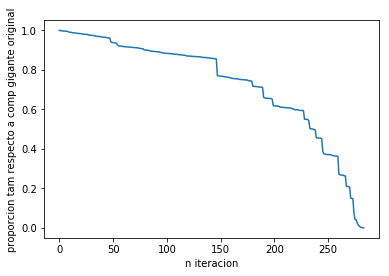

In [331]:
plt.plot(xs_res_betweeness, res_betweeness_sobre_total)
plt.xlabel("n iteracion")
plt.ylabel("proporcion tam respecto a comp gigante original")

B) Componente gigante anterior. Esta medida nos resulta interesante ya que permite ver, por ejemplo, si el tamaño de la componente gigante se reduce drásticamente entre una iteración y la siguiente. Hacia el final de las iteraciones, las componentes gigantes se separan en subgrafos cada vez más grandes respecto a la anterior.

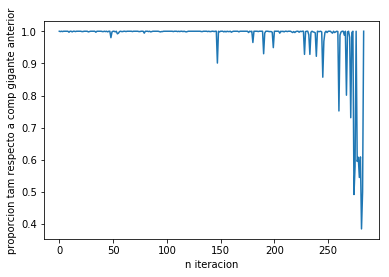

In [357]:
plt.plot(xs_res_betweeness, res_betweeness_sobre_tam_anterior)
plt.xlabel("n iteracion")
plt.ylabel("proporcion tam respecto a comp gigante anterior")

## Closeness centrality

La closeness centralitity o "cercania" es otra medida de centralidad. Esta medida calcula el promedio de las sumas de la distancias más cortas desde un nodo hacia todos los demás. A mayor valores de cercania mayor centralidad. En nuestro grafo esta medida nos permitiría dar cuenta de la "importancia" de los trabajos de un autor para todos los colegas en su red. Una especie de referente.

for cant_iteraciones:
    - componente_actual = encuentro componente conexa mas grande: componente gigante
    - guardo la proporcion de la componente_actual respecto al total
    - le calculo betweeness
    - tomo el maximo
    - lo saco

In [92]:
#valores iniciales
G_ej6 = nx.Graph()
G_ej6.add_edges_from(lista_de_tuplas)
componente_actual = componente_gigante_0
n = len(componente_actual.nodes())

In [101]:
cant_iteraciones_close = 300

In [353]:
res_sobre_total_closeness = []
res_sobre_tam_anterior_closeness = []
#for i in range(0, cant_iteraciones_close):
    #tam_anterior = len(componente_actual.nodes())
    #componente_actual = max(nx.connected_component_subgraphs(componente_actual), key=len)
    #res_sobre_total_closeness.append(len(componente_actual.nodes())/float(n))
    #res_sobre_tam_anterior_closeness.append(float(len(componente_actual.nodes()))/tam_anterior)
    #dicc_betw_actual = nx.nx.closeness_centrality(componente_actual)
    #node_with_max_betw = max(dicc_betw_actual.iteritems(), key=operator.itemgetter(1))[0]
    #componente_actual.remove_node(node_with_max_betw)

In [345]:
res_closeness_sobre_total = [1.000, 0.998, 0.998, 0.997, 0.997, 0.996, 0.995, 0.995, 0.993, 0.993, 0.993, 0.991, 0.991, 0.990, 0.990, 0.989, 0.989, 0.988, 0.988, 0.987, 0.987, 0.987, 0.986, 0.984, 0.984, 0.984, 0.983, 0.982, 0.980, 0.979, 0.978, 0.977, 0.973, 0.973, 0.971, 0.970, 0.970, 0.970, 0.969, 0.969, 0.967, 0.967, 0.966, 0.966, 0.965, 0.965, 0.965, 0.964, 0.963, 0.962, 0.962, 0.961, 0.960, 0.959, 0.959, 0.958, 0.958, 0.957, 0.956, 0.956, 0.955, 0.955, 0.954, 0.953, 0.953, 0.952, 0.951, 0.951, 0.950, 0.950, 0.950, 0.949, 0.948, 0.948, 0.946, 0.946, 0.946, 0.946, 0.945, 0.945, 0.944, 0.943, 0.943, 0.943, 0.942, 0.941, 0.940, 0.940, 0.939, 0.939, 0.938, 0.938, 0.938, 0.934, 0.934, 0.933, 0.931, 0.931, 0.931, 0.930, 0.930, 0.930, 0.929, 0.928, 0.928, 0.927, 0.927, 0.926, 0.926, 0.926, 0.925, 0.924, 0.924, 0.923, 0.923, 0.922, 0.922, 0.921, 0.921, 0.920, 0.920, 0.919, 0.918, 0.918, 0.916, 0.916, 0.915, 0.914, 0.913, 0.913, 0.911, 0.910, 0.909, 0.907, 0.906, 0.904, 0.903, 0.903, 0.902, 0.902, 0.901, 0.900, 0.899, 0.899, 0.896, 0.896, 0.895, 0.895, 0.894, 0.893, 0.892, 0.892, 0.891, 0.891, 0.890, 0.890, 0.885, 0.884, 0.884, 0.883, 0.882, 0.882, 0.882, 0.880, 0.880, 0.879, 0.879, 0.878, 0.878, 0.872, 0.871, 0.870, 0.870, 0.869, 0.869, 0.866, 0.866, 0.866, 0.864, 0.864, 0.864, 0.863, 0.862, 0.861, 0.859, 0.858, 0.857, 0.856, 0.856, 0.855, 0.855, 0.855, 0.854, 0.854, 0.853, 0.853, 0.852, 0.852, 0.851, 0.851, 0.848, 0.847, 0.846, 0.846, 0.846, 0.845, 0.845, 0.839, 0.837, 0.837, 0.836, 0.835, 0.835, 0.834, 0.832, 0.831, 0.830, 0.829, 0.828, 0.827, 0.825, 0.824, 0.822, 0.821, 0.821, 0.820, 0.819, 0.818, 0.818, 0.816, 0.816, 0.809, 0.809, 0.804, 0.803, 0.802, 0.801, 0.800, 0.799, 0.798, 0.798, 0.797, 0.797, 0.794, 0.794, 0.792, 0.792, 0.791, 0.790, 0.790, 0.789, 0.789, 0.789, 0.788, 0.788, 0.788, 0.787, 0.787, 0.787, 0.786, 0.786, 0.783, 0.782, 0.782, 0.781, 0.781, 0.781, 0.779, 0.778, 0.777, 0.773, 0.772, 0.772, 0.772, 0.769, 0.768, 0.768, 0.767, 0.767, 0.763, 0.763, 0.762, 0.759, 0.380, 0.377, 0.251, 0.250, 0.125, 0.045, 0.022, 0.011, 0.006, 0.002, 0.001, 0.001, 0.000]

In [352]:
res_closeness_sobre_tam_anterior = [1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 0.999, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.998, 1.000, 1.000, 1.000, 0.999, 0.998, 0.999, 1.000, 0.999, 0.997, 1.000, 0.998, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 0.999, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.997, 1.000, 1.000, 0.998, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.999, 1.000, 0.999, 1.000, 1.000, 0.999, 0.999, 1.000, 0.998, 1.000, 0.999, 0.997, 0.999, 0.999, 0.999, 1.000, 0.999, 1.000, 0.999, 0.999, 1.000, 1.000, 0.998, 1.000, 0.999, 1.000, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 0.996, 0.999, 1.000, 0.999, 1.000, 1.000, 1.000, 0.999, 1.000, 0.999, 1.000, 1.000, 1.000, 0.994, 0.999, 1.000, 1.000, 0.999, 1.000, 0.998, 1.000, 1.000, 0.999, 1.000, 1.000, 0.999, 1.000, 0.999, 0.997, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.997, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 0.993, 0.999, 1.000, 0.998, 1.000, 1.000, 0.999, 0.998, 1.000, 0.998, 0.999, 1.000, 0.998, 0.998, 1.000, 0.998, 1.000, 1.000, 0.999, 1.000, 0.999, 1.000, 0.998, 1.000, 0.992, 1.000, 0.995, 0.998, 0.999, 1.000, 0.999, 1.000, 0.999, 1.000, 1.000, 1.000, 0.997, 1.000, 0.998, 1.000, 1.000, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.997, 0.999, 1.000, 1.000, 1.000, 1.000, 0.999, 0.998, 1.000, 0.995, 1.000, 1.000, 1.000, 0.997, 1.000, 1.000, 1.000, 1.000, 0.996, 1.000, 1.000, 0.997, 0.500, 0.993, 0.667, 1.000, 0.501, 0.357, 0.496, 0.515, 0.515, 0.375, 0.600, 1.000, 1.000]

In [355]:
xs_res_closeness = range(len(res_closeness_sobre_total))

Repetimos ambos experimentos con la medida de Closeness Centrality

En esta ocasión, observamos para el primer experimento un fenómeno de percolación mucho más marcado

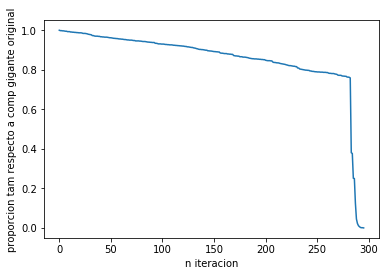

In [356]:
plt.plot(xs_res_closeness, res_closeness_sobre_total)
plt.xlabel("n iteracion")
plt.ylabel("proporcion tam respecto a comp gigante original")

El fenómeno de percolación también puede observarse en el segundo experimento, en donde las componentes conexas mantienen prácticamente su tamaño durante gran cantidad de

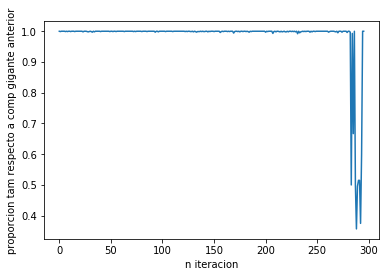

In [358]:
plt.plot(xs_res_closeness, res_closeness_sobre_tam_anterior)
plt.xlabel("n iteracion")
plt.ylabel("proporcion tam respecto a comp gigante anterior")